<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2 
## Roshan Lulu

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [51]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [52]:
# Load file with a csv module
sat_csv = []
with open('./sat_scores.csv', 'r') as sat_score:
    reader = csv.reader(sat_score)
    for row in reader:
        sat_csv.append(row)
        
sat_score.close()
header = sat_csv[0]
rows = sat_csv[1:]

# Put file contents into a dictionary
# Code to convert data read with help of csv reader to dictionary
sat_dict = {col:[row[index] for row in rows]    for index, col in enumerate(header)}
sat_dict

{'Math': ['510',
  '513',
  '515',
  '505',
  '516',
  '499',
  '499',
  '506',
  '500',
  '501',
  '499',
  '510',
  '499',
  '489',
  '501',
  '488',
  '474',
  '526',
  '499',
  '527',
  '499',
  '515',
  '510',
  '517',
  '525',
  '515',
  '542',
  '439',
  '539',
  '512',
  '542',
  '553',
  '542',
  '589',
  '550',
  '545',
  '572',
  '589',
  '580',
  '554',
  '568',
  '561',
  '577',
  '562',
  '596',
  '550',
  '570',
  '603',
  '582',
  '599',
  '551',
  '514'],
 'Rate': ['82',
  '81',
  '79',
  '77',
  '72',
  '71',
  '71',
  '69',
  '69',
  '68',
  '67',
  '65',
  '65',
  '63',
  '60',
  '57',
  '56',
  '55',
  '54',
  '53',
  '53',
  '52',
  '51',
  '51',
  '34',
  '33',
  '31',
  '26',
  '23',
  '18',
  '17',
  '13',
  '13',
  '12',
  '12',
  '11',
  '11',
  '9',
  '9',
  '9',
  '8',
  '8',
  '8',
  '7',
  '6',
  '6',
  '5',
  '5',
  '4',
  '4',
  '4',
  '45'],
 'State': ['CT',
  'NJ',
  'MA',
  'NY',
  'NH',
  'RI',
  'PA',
  'VT',
  'ME',
  'VA',
  'DE',
  'MD',
  'NC',

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

#### ANS: The numerical values in the dataframe created from dictionary is an object. Whereas, it is of the type int64 when read using csv.

In [53]:
# Create dataframe with dictionary
sat_dict_df = pd.DataFrame(sat_dict)
print('\nDatatypes - Dictionary dataframe\n', sat_dict_df.dtypes)

# Create dataframe directly from csv
sat_df = pd.read_csv('./sat_scores.csv')
print('\nDatatypes - Csv dataframe\n', sat_df.dtypes)


Datatypes - Dictionary dataframe
 Math      object
Rate      object
State     object
Verbal    object
dtype: object

Datatypes - Csv dataframe
 State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object


If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

#### ANS: Data description:  The dataset comprises of 52 states with their SAT percentages, Verbal and Math scores for every state.

In [54]:
sat_df.head(10)

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


In [55]:
print('\nDescribe data\n')
sat_df.describe()


Describe data



,Rate,Verbal,Math
count,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000
std,27.301788,33.236225,36.014975
min,4.000000,482.000000,439.000000
25%,9.000000,501.000000,504.000000
50%,33.500000,526.500000,521.000000
75%,63.500000,562.000000,555.750000
max,82.000000,593.000000,603.000000


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [56]:
# Convert the data types to a dictionary format and add the shape of the dataset
sat_data_dict = (sat_df.dtypes.apply(lambda x: {'Data type':x.name} ).to_dict())
sat_data_dict.update({'Shape':sat_df.shape})

# Add Description to the column name values
sat_txt_desc = ['State for which SAT scores are noted', 'Average Percentage', 'Verbal Section Scores', 'Math Section Scores', '(Rows, columns) of the dataset']
[sat_data_dict.update({key:[sat_data_dict[key], {'Description':text}]})
                for key, text in zip(sat_data_dict, sat_txt_desc)]

print('\nThe data dictionary of SAT scores dataset is: \n')
# Print data dictionary
for key, value in sat_data_dict.items():
    print (key, ' : ', value)


The data dictionary of SAT scores dataset is: 

State  :  [{'Data type': 'object'}, {'Description': 'State for which SAT scores are noted'}]
Rate  :  [{'Data type': 'int64'}, {'Description': 'Average Percentage'}]
Verbal  :  [{'Data type': 'int64'}, {'Description': 'Verbal Section Scores'}]
Math  :  [{'Data type': 'int64'}, {'Description': 'Math Section Scores'}]
Shape  :  [(52, 4), {'Description': '(Rows, columns) of the dataset'}]


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

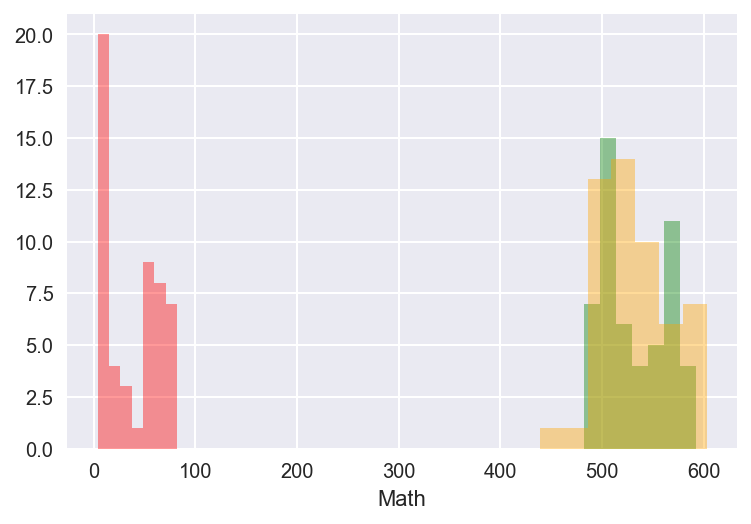

In [57]:
sns.distplot(sat_df['Rate'], bins = 7, kde = False, color = 'r', vertical = False)
sns.distplot(sat_df['Verbal'], bins = 7, kde = False, color = 'g', vertical = False)
sns.distplot(sat_df['Math'], bins = 7, kde = False, color = 'orange', vertical = False)

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

#### ANS: The pair plot plot is a good visualization tool to view all numeric values against each other on either axis. This along with the hue based on the State column is helpful in identifying any pattern and relating it to a state. 
#### - The Verbal and math scores have a positive linear relationship. The Verbal/Math have negative linear correlation with the Rate.

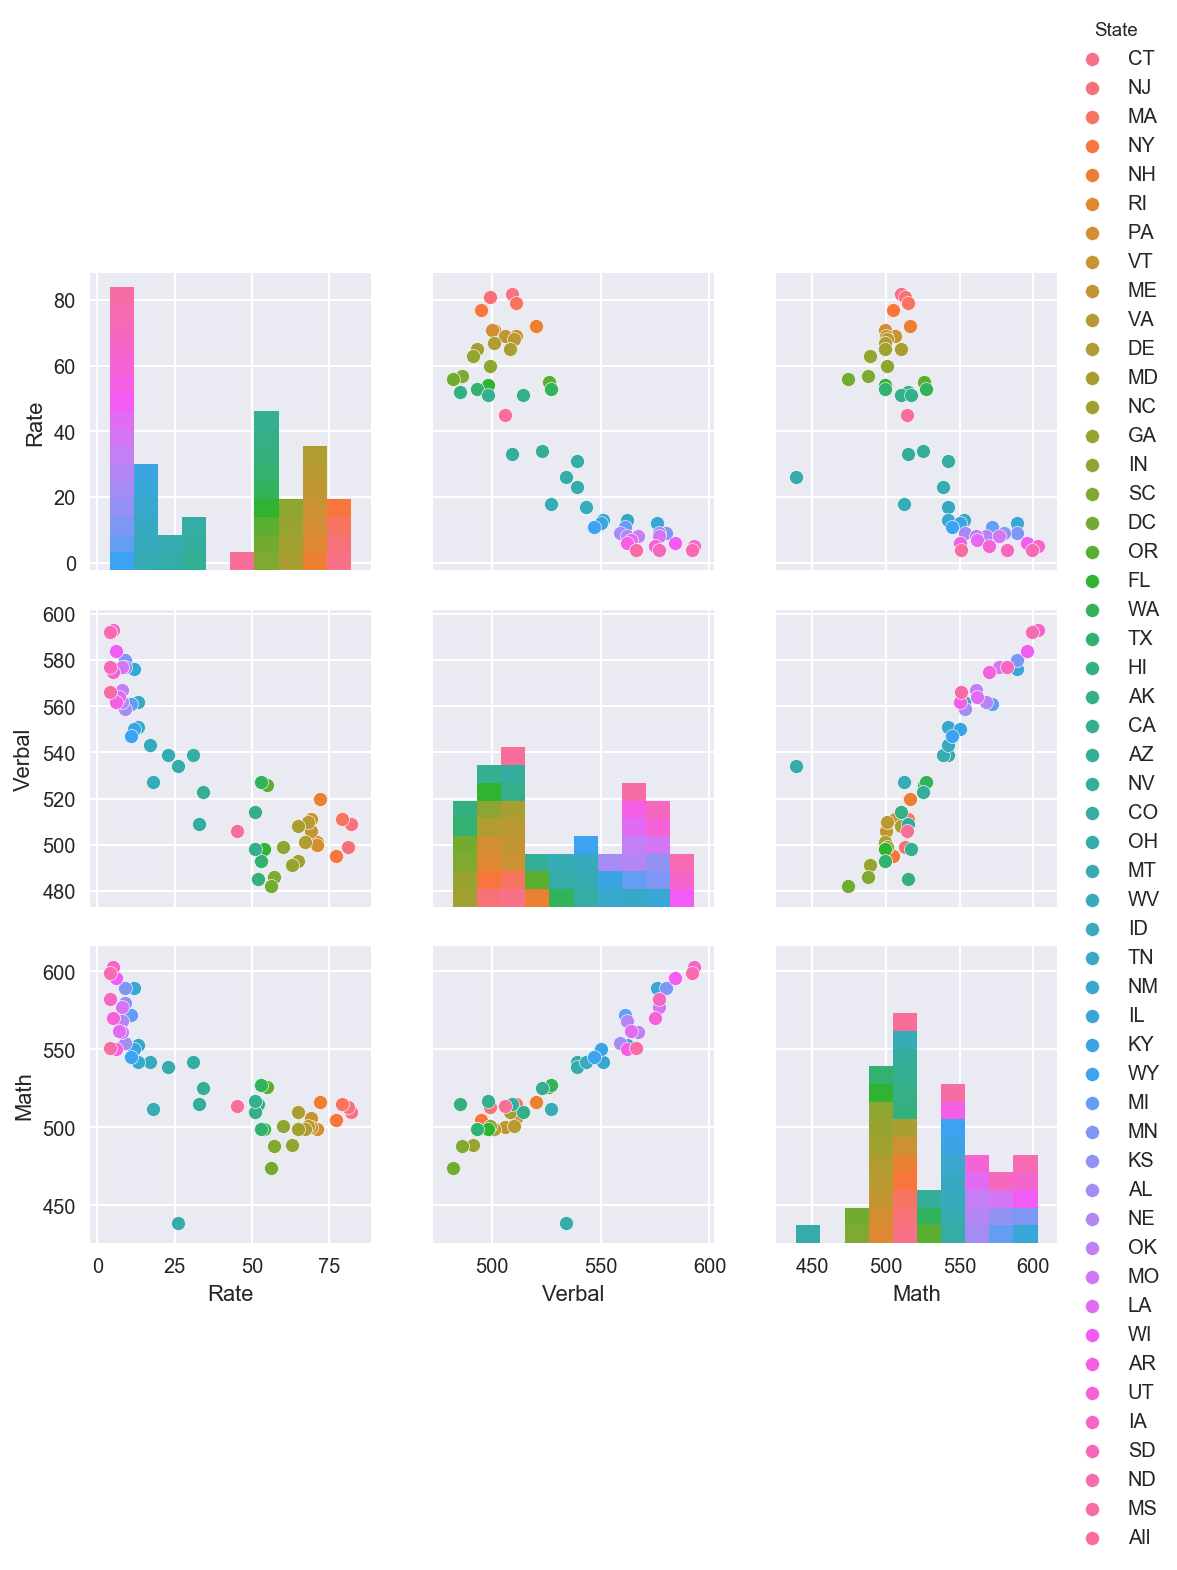

In [58]:
sns.pairplot(sat_df, hue = 'State')

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

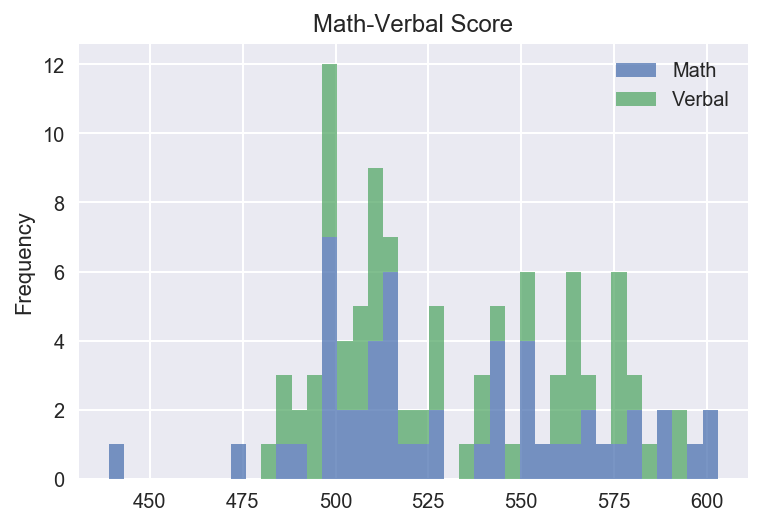

In [59]:
sat_mv_df = pd.DataFrame({'Math':sat_df.Math, 'Verbal':sat_df.Verbal} , columns=['Math', 'Verbal'])
sat_mv_df.plot.hist(stacked = True, bins = 40, alpha = 0.75, title = 'Math-Verbal Score', grid = True)

##Ans: Verbal scores are closely distributed than Math.

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?
#### Ans: Better visualization of the score range and the quartile values. With histogram or scatter plot, it is not possible to read the descriptive statistical values in a glance. Range(Math) > Range(Verbal). Median(Verbal) > Median (Range)

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?
#### Ans: Math and Verbal scores are at a close range, hence the output graph would be normalized. The values in Range column have no overlap with the other columns, hence resulting in a graph that is not normalized.

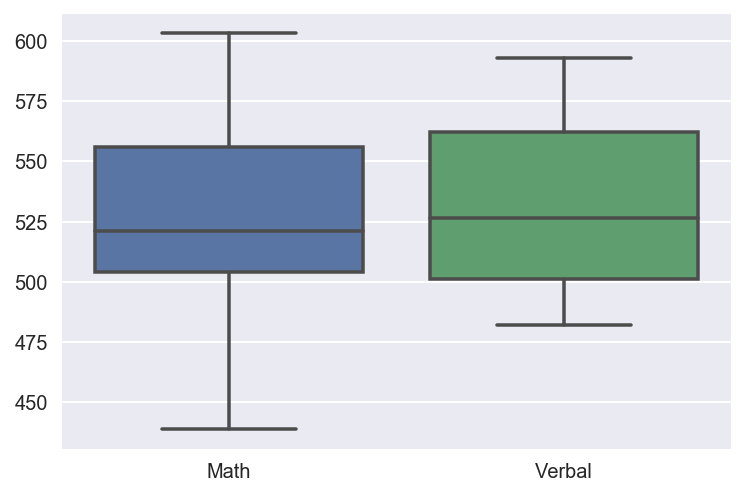

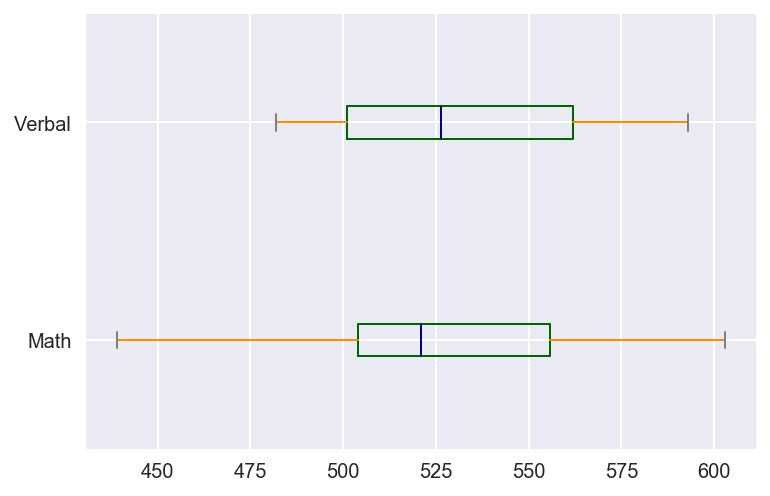

In [60]:
# Function to draw a box plot.
# Parameters 
#     dict_of_values - A dictionary with the desired plot values mapped to their column names
#     list_of_names - List of the Columns to be plotted
#     kind - Choose plots style between pandas and seaborn
#     data - The dataframe to be plotted
# Return value-
#     None
plot_w_panda = 0
plot_w_seaborn = 1
def draw_boxplot(dict_of_values, list_of_names, kind = plot_w_panda, data = sat_df):
    if kind == plot_w_panda:
        color = dict(boxes='DarkGreen', whiskers='DarkOrange', medians='DarkBlue', caps='Gray')
        sat_plot_df = pd.DataFrame(dict_of_values, columns = list_of_names)
        sat_plot_df.plot.box(color = color, vert = False)
    else:
        sns.boxplot(data = data, order = list_of_names)
    
# Plot Math and Verbal on the same chart
draw_boxplot({'Math':sat_df.Math, 'Verbal':sat_df.Verbal} , ['Math', 'Verbal'], plot_w_seaborn)  
draw_boxplot({'Math':sat_df.Math, 'Verbal':sat_df.Verbal} , ['Math', 'Verbal'], plot_w_panda)  

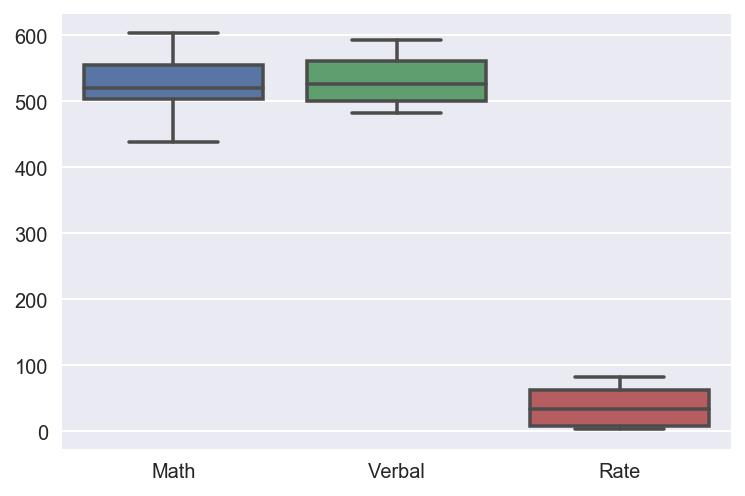

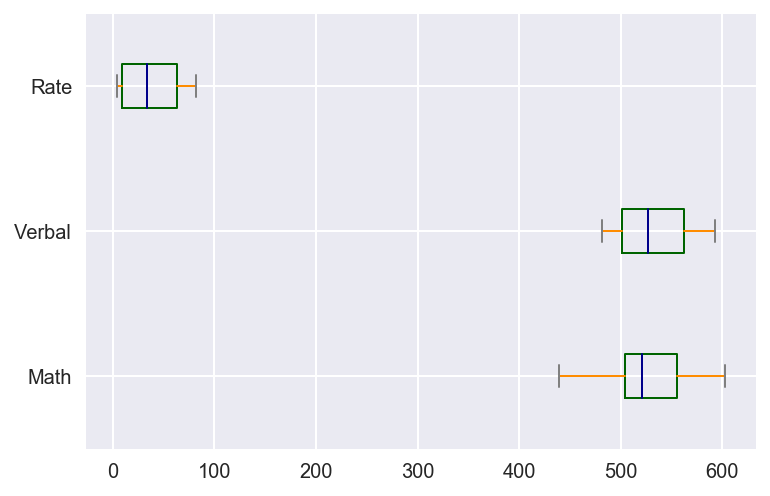

In [61]:
# Plot Math, Verbal and Rate on the same chart before standardization
draw_boxplot({'Math':sat_df.Math, 'Verbal':sat_df.Verbal, 'Rate':sat_df.Rate} , ['Math', 'Verbal', 'Rate'], plot_w_seaborn)
draw_boxplot({'Math':sat_df.Math, 'Verbal':sat_df.Verbal, 'Rate':sat_df.Rate} , ['Math', 'Verbal', 'Rate'], plot_w_panda)

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 

#### Ans: Box plot is good to compare statistical parameters when plotted on the same chart. It would make sens if they are all scaled proportionately. Hence, the variables need to be rescaled using a procedure called "standardization", which forces the distribution of each variable to have a mean of 0 and a standard deviation of 1.
#### standardized_variable = (variable - mean_of_variable) / std_dev_of_variable
#### Observations: 

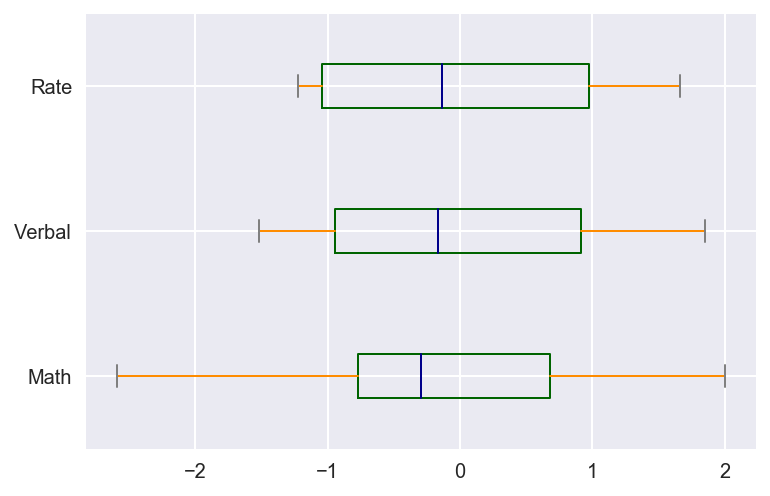

In [62]:
# Function to standardize the columns using the formulae: 
#     standardized_variable = (variable - mean_of_variable) / std_dev_of_variable
# Parameters-
#     col_df: The column to be standardized is passed as the parameter
# Return value-
#   Standardized values are returned
def standardize_columns(col_df):
    col_df_mean = np.mean(col_df)
    col_df_std = np.std(col_df)
    col_df_norm = (col_df - col_df_mean)/col_df_std
    return col_df_norm

# Standardize all the columns to be visualized as box plots on the same chart 
sat_std = pd.DataFrame()
for col in sat_df.columns:
    if(col != 'State'):
        sat_std[col] = standardize_columns(sat_df[col])

# Plot Math, Verbal and Rate on the same chart after standardization
draw_boxplot({'Math':sat_std.Math, 'Verbal':sat_std.Verbal, 'Rate':sat_std.Rate}, ['Math', 'Verbal', 'Rate'], plot_w_panda)

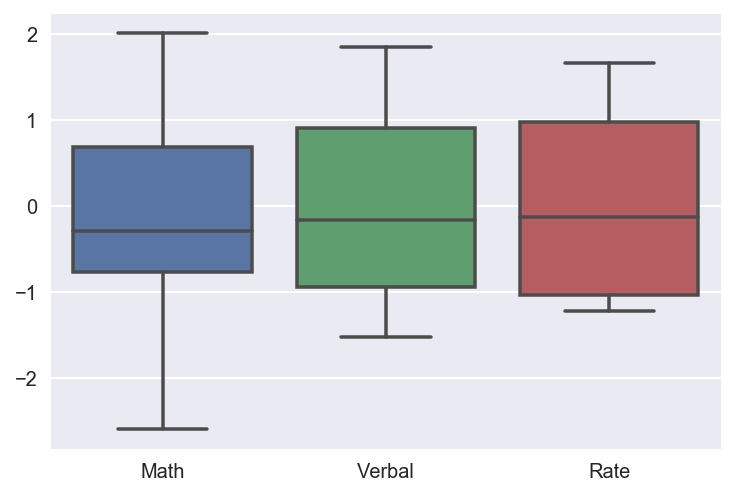

In [63]:
draw_boxplot({'Math':sat_std.Math, 'Verbal':sat_std.Verbal, 'Rate':sat_std.Rate}, ['Math', 'Verbal', 'Rate'], plot_w_seaborn, data = sat_std)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [64]:
# This function takes in the mask and provides the list of states based on the mask. 
# The function also prints the result
# Parameters - 
#           cut off value - Find states above the cut off value
#           mask - List the states based on the mask
#           text - This is used to print the output message. eg: If the cut off value is based on mean, pass text = mean
#           data - the default dataframe is provided here
def get_num_of_states(cut_off_value, mask, text, data = sat_df):
    list_of_states = list(data[mask].State.unique())
    count = len(list_of_states)
    total_states = len(data.State.unique())
    print(count,'out of the',total_states,'states have Verbal scores greater than the',text,round(cut_off_value, 2),':\n', list_of_states)

# Find mean of Verbal scores
mean_v = np.mean(sat_df.Verbal)
# Create a mask that returns true when the Verbal score is greater than its mean
mask = sat_df.Verbal > mean_v
get_num_of_states(mean_v, mask, 'mean')

print('\nThe number of values that are greater than the mean is slightly less than 50% of the values. Theoretically, it is a  right skewed distribution, but since mean~= median it is considered as a normally distributed')

24 out of the 52 states have Verbal scores greater than the mean 532.02 :
 ['CO', 'OH', 'MT', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS']

The number of values that are greater than the mean is slightly less than 50% of the values. Theoretically, it is a  right skewed distribution, but since mean~= median it is considered as a normally distributed


### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [65]:
# Find the median of Verbal scores
median_v = np.median(sat_df.Verbal)
# Create a mask that returns true when the Verbal score is greater than its median
mask = sat_df.Verbal > median_v
get_num_of_states(median_v, mask, 'median')
print('\nThe median is lesser than the mean. The number of states greater than mean will always be more than 50% of the values.')

26 out of the 52 states have Verbal scores greater than the median 526.5 :
 ['WA', 'CO', 'OH', 'MT', 'WV', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS']

The median is lesser than the mean. The number of states greater than mean will always be more than 50% of the values.


### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [66]:
sat_df['VM_diff'] = sat_df.Verbal - sat_df.Math
sat_df.head()

,State,Rate,Verbal,Math,VM_diff
0,CT,82,509,510,-1
1,NJ,81,499,513,-14
2,MA,79,511,515,-4
3,NY,77,495,505,-10
4,NH,72,520,516,4


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [67]:
# This function sorts the Dataframe wrt the VM_diff column.
# Parameters - 
#           isTrue - Returns the top ten value if True, else bottom ten values
# Return - returns the top ten or last ten values of the sorted dataframe

def get_top_ten(isTrue):
    sat_VM_diff = sat_df.sort_values('VM_diff', ascending = isTrue)[:10]
    sat_VM_diff.index = (range(0,10))
    return pd.DataFrame(sat_VM_diff.State)

# 1. Get the dataframe with top 10 states where Verbal > Math
VM_diff_asc = False
get_top_ten(VM_diff_asc)

,State
0,OH
1,MS
2,WV
3,AR
4,NM
5,TN
6,VA
7,DC
8,ME
9,OK


In [68]:
# 2. Get the dataframe with top 10 states where Math > verbal
VM_diff_asc = True
get_top_ten(VM_diff_asc)

,State
0,HI
1,CA
2,NJ
3,IL
4,WI
5,MI
6,NY
7,IA
8,MN
9,All


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?

#### Ans: 
#####  Rate and Verbal/Math have a negative correlation i.e. there is a decrease in the Verbal/Math values when the Rate increases. The decrease is more for Verbal when compared to Math. 
##### Verbal and Math display a positive correlation correlation with each other.

In [69]:
del sat_df['VM_diff']

In [71]:
sat_df.corr()

,Rate,Verbal,Math
Rate,1.000000,-0.886432,-0.773746
Verbal,-0.886432,1.000000,0.899871
Math,-0.773746,0.899871,1.000000


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

#### Ans - Describe provides statistical measures of the numerical columns in a dataframe unles sotherwise specified.
- Count - Indicates the total number of samples(rows) hat create the columns in the dataset.
- Mean - The average value of the data points in the specified column
- std - The standard deviation of the column
- min - The least value in the column
- 25% - The 25th percentile value of the column
- 50% - The 50th percentile value of the column
- 75% - The 75th percentile value of the column
- max - The highest value in the column


In [72]:
sat_df.describe()

,Rate,Verbal,Math
count,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000
std,27.301788,33.236225,36.014975
min,4.000000,482.000000,439.000000
25%,9.000000,501.000000,504.000000
50%,33.500000,526.500000,521.000000
75%,63.500000,562.000000,555.750000
max,82.000000,593.000000,603.000000


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
#### ANS: Correlation is measured in the range -1 to 1 and is easier to interpret. Covariance values are dependant on thevariance and unit of the values and is not a good measure to compare relations as they are not normalized.
2. What is the process to convert the covariance into the correlation?
#### Cor(X,Y) = Cov(X, Y) / Std(X) Std(Y)
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?
#### "Covariance is the measure of relatedness between variables. Covariance is not very interpretable. The values are difficult to read because they are relative to the variance of the variables. A much more common metric, and one directly calculable from the covariance, is the correlation."

In [78]:
''' 
# Create the covariance matrix based on individual covariance values
rate_val = sat_df.Rate.values
math_val = sat_df.Math.values
verbal_val = sat_df.Verbal.values

rm_cov = np.cov(rate_val, math_val, bias = True)
rv_cov = np.cov(rate_val, verbal_val, bias = True)
mv_cov = np.cov(math_val, verbal_val, bias = True)
# print(rm_cov,'\n',rv_cov,'\n',mv_cov)
row1 = [rm_cov[0][0], rv_cov[0][1], rm_cov[0][1]]
row2 = [rv_cov[0][1], rv_cov[1][1], mv_cov[0][1]]
row3 = [rm_cov[0][1], mv_cov[0][1], rm_cov[1][1]] 
names = ['Rate', 'Verbal', 'Math']
cov_sat_df = pd.DataFrame([row1, row2, row3], columns = names, index = names)
# Print the covariance matrxi
cov_sat_df
'''
# Print the covariance matrix using the available 
sat_df.corr()

,Rate,Verbal,Math
Rate,1.000000,-0.886432,-0.773746
Verbal,-0.886432,1.000000,0.899871
Math,-0.773746,0.899871,1.000000


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [558]:
drug_df = pd.read_csv('./drug-use-by-age.csv')
print(drug_df.shape)
drug_df

(17, 28)


,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0
5,17,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,...,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5
6,18,2469,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,...,1.7,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0
7,19,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,...,1.5,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0
8,20,2271,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,...,1.7,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0
9,21,2354,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.0,...,1.3,13.5,3.9,7.0,4.1,10.0,0.6,2.0,0.3,9.0


In [559]:
drug_df.columns

Index(['age', 'n', 'alcohol-use', 'alcohol-frequency', 'marijuana-use',
       'marijuana-frequency', 'cocaine-use', 'cocaine-frequency', 'crack-use',
       'crack-frequency', 'heroin-use', 'heroin-frequency', 'hallucinogen-use',
       'hallucinogen-frequency', 'inhalant-use', 'inhalant-frequency',
       'pain-releiver-use', 'pain-releiver-frequency', 'oxycontin-use',
       'oxycontin-frequency', 'tranquilizer-use', 'tranquilizer-frequency',
       'stimulant-use', 'stimulant-frequency', 'meth-use', 'meth-frequency',
       'sedative-use', 'sedative-frequency'],
      dtype='object')

In [560]:
## Are Variables missing?
drug_df.isnull().sum()
## Ans: None of the columns have null values

age                        0
n                          0
alcohol-use                0
alcohol-frequency          0
marijuana-use              0
marijuana-frequency        0
cocaine-use                0
cocaine-frequency          0
crack-use                  0
crack-frequency            0
heroin-use                 0
heroin-frequency           0
hallucinogen-use           0
hallucinogen-frequency     0
inhalant-use               0
inhalant-frequency         0
pain-releiver-use          0
pain-releiver-frequency    0
oxycontin-use              0
oxycontin-frequency        0
tranquilizer-use           0
tranquilizer-frequency     0
stimulant-use              0
stimulant-frequency        0
meth-use                   0
meth-frequency             0
sedative-use               0
sedative-frequency         0
dtype: int64

In [561]:
# Melt the drug dataframe to a long format
drug_long = pd.melt(drug_df, id_vars=['age'])
drug_long.sort_values('age', inplace = True)
drug_long.index = (range(0,459))
drug_long.head()

,age,variable,value
0,12,n,2798
1,12,meth-frequency,-
2,12,marijuana-use,1.1
3,12,crack-use,0
4,12,alcohol-frequency,3


In [562]:
print('Shape', drug_long.shape)
## Check the datatypes of the values
print('\nDatatypes\n', drug_long.dtypes)
## The datatype of value column is an object. It is easier for EDA if it is a float.
print('\nUnique values in values\n', drug_long.value.unique())
## Age column displays data in multiple formats(single age/age range). It is easy for EDA if the format is consistent
print('\nUnique age values', drug_long.age.unique())

Shape (459, 3)

Datatypes
 age         object
variable    object
value       object
dtype: object

Unique values in values
 [2798 '-' 1.1 0.0 3.0 0.2 '35.5' 0.1 2.0 52.0 4.0 36.0 3.9 '24.5' '19.0'
 1.6 13.0 '5.0' 14.0 25.5 3.4 0.3 '1.0' 15.0 '3.0' '41.0' 2757 2.4 0.6 8.5
 19.0 2.5 '12.0' 6.0 18.1 '4.5' 0.8 2.6 '5.5' 0.9 5.0 2792 16.5 0.4 12.0
 '2.0' 8.7 '24.0' 24.0 10.0 '4.0' 5.5 '10.5' 14.5 2.1 1.5 2956 4.5 25.0
 '9.5' 30.0 0.5 29.2 6.2 '66.5' 7.0 11.0 1.8 22.5 '36.0' 1.0 '7.0' 9.5 40.1
 3058 9.0 1.4 3038 49.3 6.5 '48.0' 4.8 28.0 '64.0' '21.0' 3.5 2.8 '6.0' 8.0
 '10.0' 9.2 58.7 4.9 2469 33.7 3.2 '46.0' 1.7 64.6 60.0 4.1 4.2 2223 33.4
 '7.5' 9.4 8.6 '180.0' 3.3 '105.0' 5.4 '45.0' 7.4 '8.0' 34.0 48.0 69.7 2271
 '13.5' '30.0' 33.0 1.3 '17.0' 6.3 83.2 2354 4707 28.4 3.6 4.4 '57.5' 5.2
 '17.5' 84.2 '20.0' 4.3 17.5 4591 83.1 0.7 '88.0' 24.9 2.3 2628 20.8 80.7
 8.3 1.2 '50.0' 77.5 16.4 '54.0' 22.0 '15.0' 72.0 '3.5' 5.9 2864 '66.0'
 10.4 1.9 75.0 '280.0' '104.0' 7391 3923 44.0 67.2 '62.0' 7.3

In [563]:
## Clean the 'value' column
## Missing data is displayed as -
## This needs to be replaced with 0 and then converted to float
drug_long.value = [float(value.replace('-', '-1')) if value is '-'
                   else float(value)
                   for value in drug_long.value]

In [564]:
## Clean the 'age' column
## Age column displays data in multiple formats such as single age or an age range. 
## It is easy for EDA if the format is consistent
[drug_df.age.replace(a, int(a[0:2]), inplace = True) for a in drug_df.age.unique()]
[drug_long.age.replace(a, int(a[0:2]), inplace = True) for a in drug_long.age.unique()]
print('\nUnique age values', drug_long.age.unique())


Unique age values [12 13 14 15 16 17 18 19 20 21 22 24 26 30 35 50 65]


In [565]:
print(drug_long.dtypes)
# Converted age and value

age           int64
variable     object
value       float64
dtype: object


### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

In [566]:
import re
# The table provides data of 2 types. 
# 1. Age vs level of drug usage
# 2. Age vs frequency of drug usage
# First step - Split the table into 2 for easier comparison
def checkforstring(substring, string):
    return (re.search(substring, string))

level_col = [col for col in drug_df.columns if(checkforstring('use', col) != None)]
# New dataframe separated base don usage and frequency of drugs
drug_level = drug_df.drop(freq_col, axis = 1)
# The datatypes are all float/int. Hence clean enough to plot graphs
drug_level.dtypes

age                    int64
n                      int64
alcohol-use          float64
marijuana-use        float64
cocaine-use          float64
crack-use            float64
heroin-use           float64
hallucinogen-use     float64
inhalant-use         float64
pain-releiver-use    float64
oxycontin-use        float64
tranquilizer-use     float64
stimulant-use        float64
meth-use             float64
sedative-use         float64
dtype: object

In [567]:
freq_col =[col for col in drug_df.columns if(checkforstring('frequency', col) != None)]
# New dataframe separated base don usage and frequency of drugs
drug_freq = drug_df.drop(level_col, axis = 1)
# Certain datatypes are objects, hence will need cleaning
drug_freq.dtypes

age                          int64
n                            int64
alcohol-frequency          float64
marijuana-frequency        float64
cocaine-frequency           object
crack-frequency             object
heroin-frequency            object
hallucinogen-frequency     float64
inhalant-frequency          object
pain-releiver-frequency    float64
oxycontin-frequency         object
tranquilizer-frequency     float64
stimulant-frequency        float64
meth-frequency              object
sedative-frequency         float64
dtype: object

In [568]:
# Convert all columns in frequency datatype to float
for col in drug_freq.columns:
    drug_freq[col] = [0 if val == '-' else float(val)  for val in drug_freq[col]]
print(drug_freq.dtypes)

age                        float64
n                          float64
alcohol-frequency          float64
marijuana-frequency        float64
cocaine-frequency          float64
crack-frequency            float64
heroin-frequency           float64
hallucinogen-frequency     float64
inhalant-frequency         float64
pain-releiver-frequency    float64
oxycontin-frequency        float64
tranquilizer-frequency     float64
stimulant-frequency        float64
meth-frequency             float64
sedative-frequency         float64
dtype: object


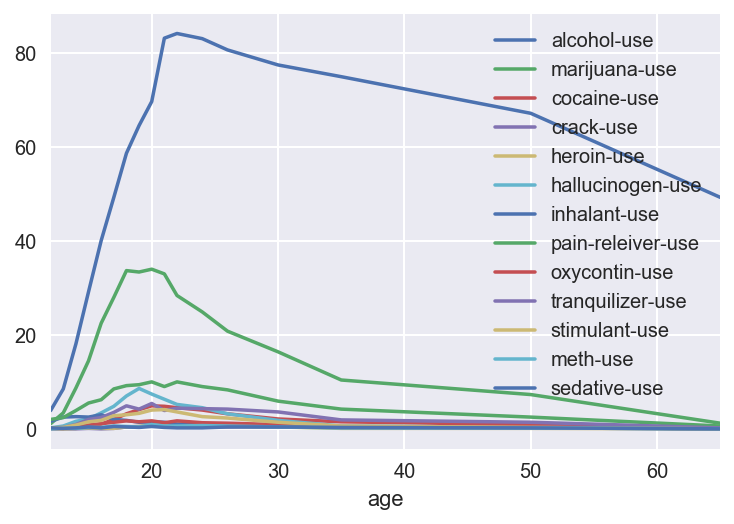

In [569]:
y_axis = drug_level.columns.drop('age')
y_axis = y_axis.drop('n')
drug_level.plot(x='age', y=y_axis)

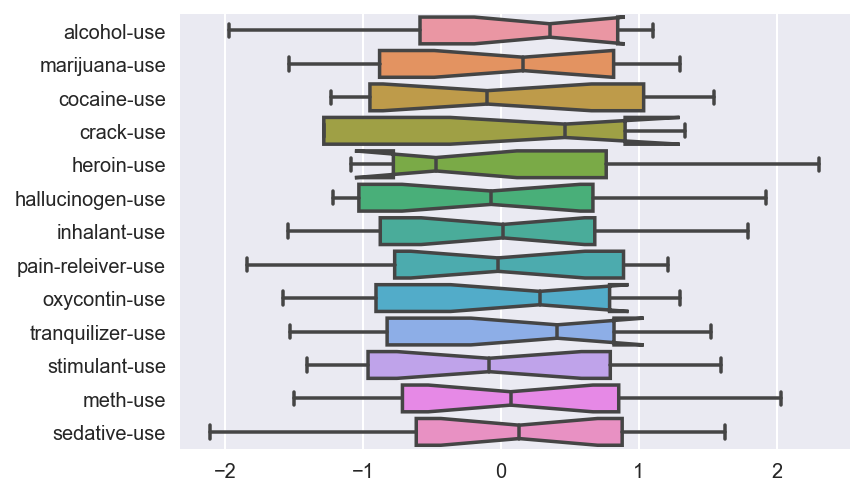

In [575]:
# Standardize all the columns to be visualized as box plots on the same chart - Use function from earlier dataset
drug_level_std = pd.DataFrame()
for col in drug_level.columns:
    if(col != 'age' and col != 'n'):
        drug_level_std[col] = standardize_columns(drug_level[col])

sns.boxplot(data = drug_level_std, order = y_axis, hue_order = 'age', notch = True, orient = 'h')

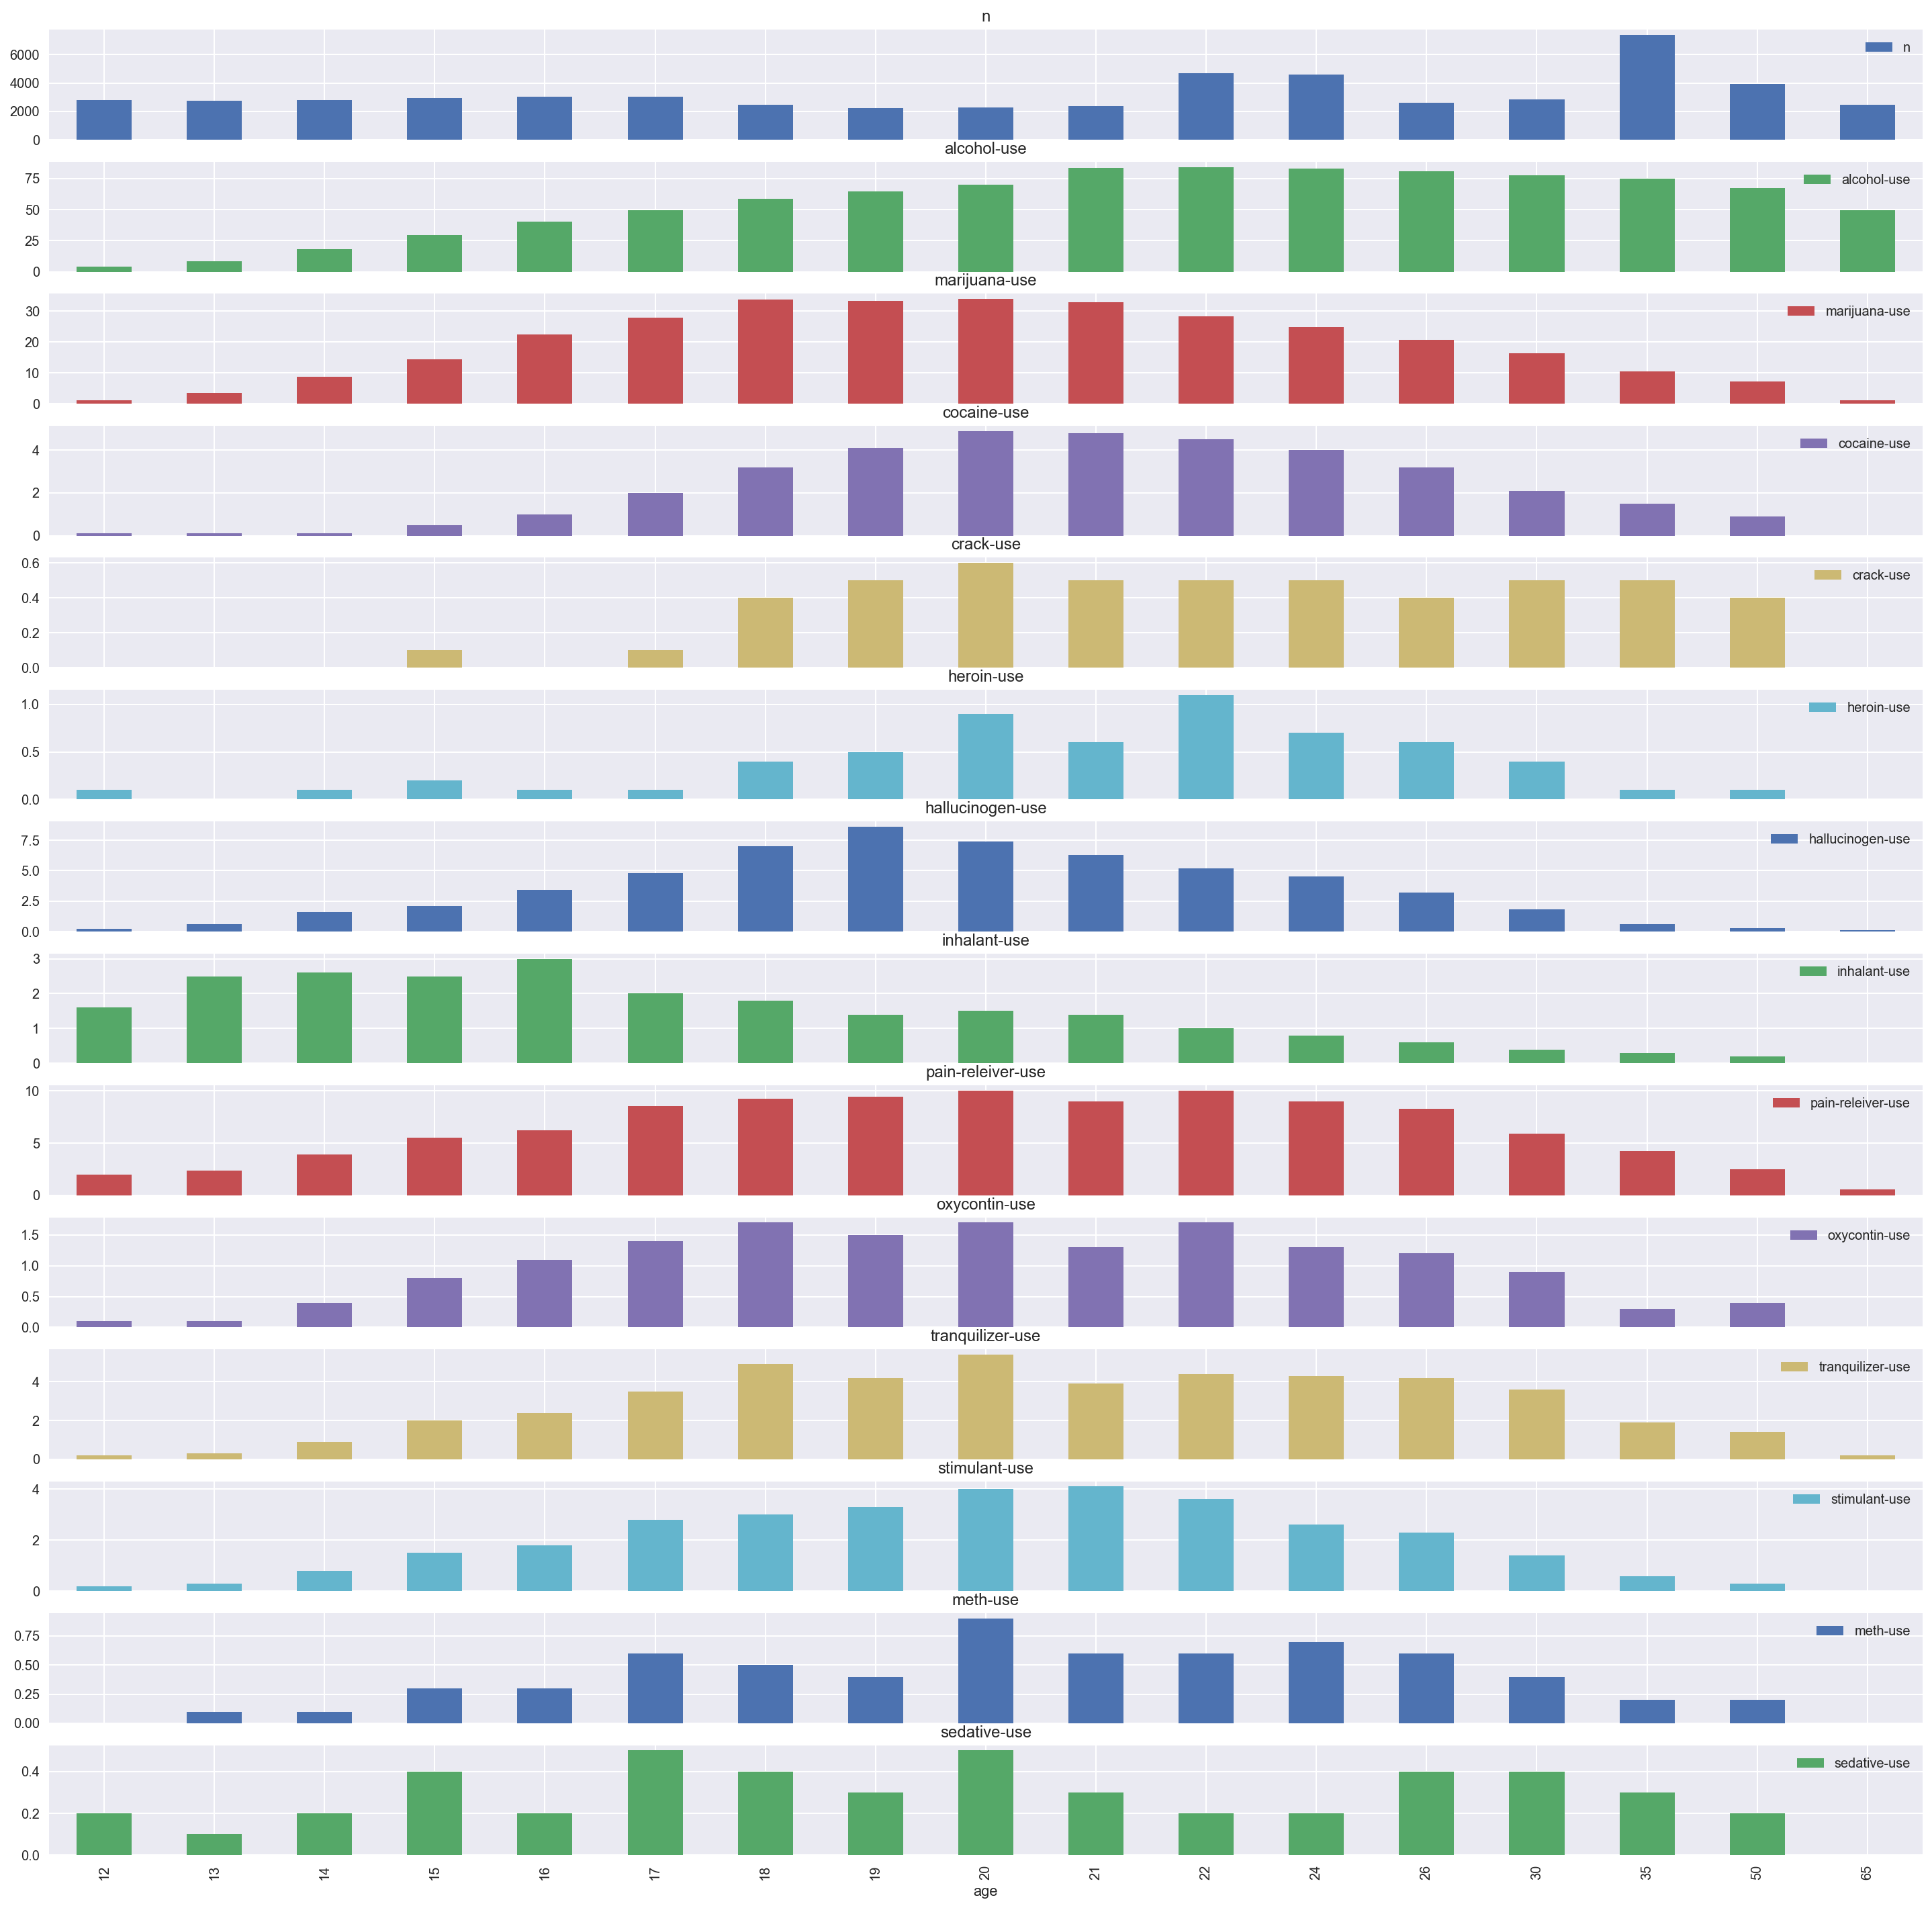

In [576]:
drug_level.plot(x='age', kind='bar',grid=True,subplots=True,sharex=True, figsize = (25, 25));
# The below plot helps map a drug use level to an age group

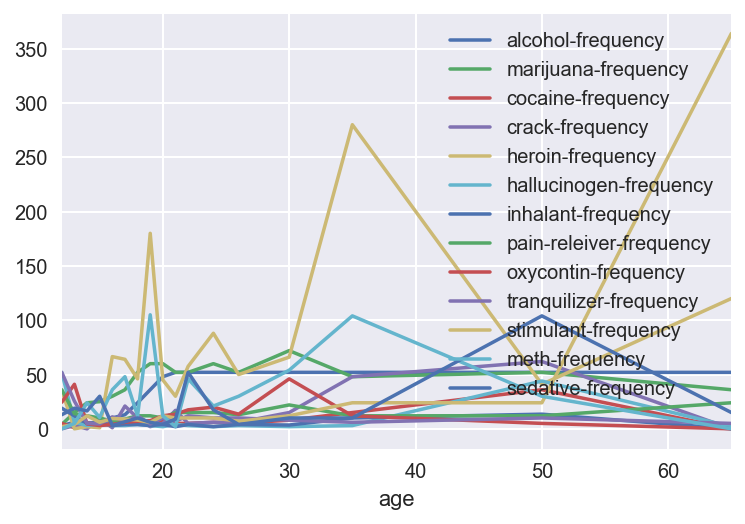

In [577]:
y_axis = drug_freq.columns.drop('age')
y_axis = y_axis.drop('n')
drug_freq.plot(x='age', y=y_axis)

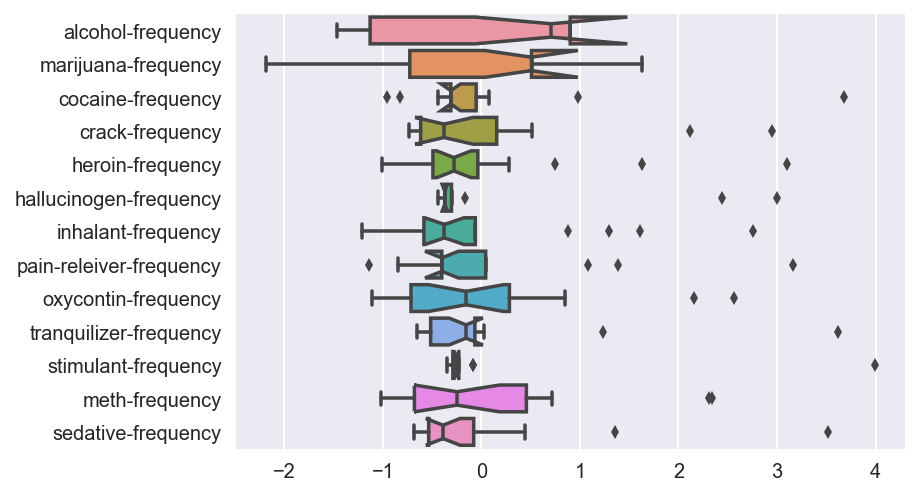

In [586]:
# Standardize all the columns to be visualized as box plots on the same chart - Use function from earlier dataset
drug_freq_std = pd.DataFrame()
for col in drug_freq.columns:
    if(col != 'age' and col != 'n'):
        drug_freq_std[col] = standardize_columns(drug_freq[col])

sns.boxplot(data = drug_freq_std, order = y_axis, hue_order = 'age', notch = True, orient = 'h')

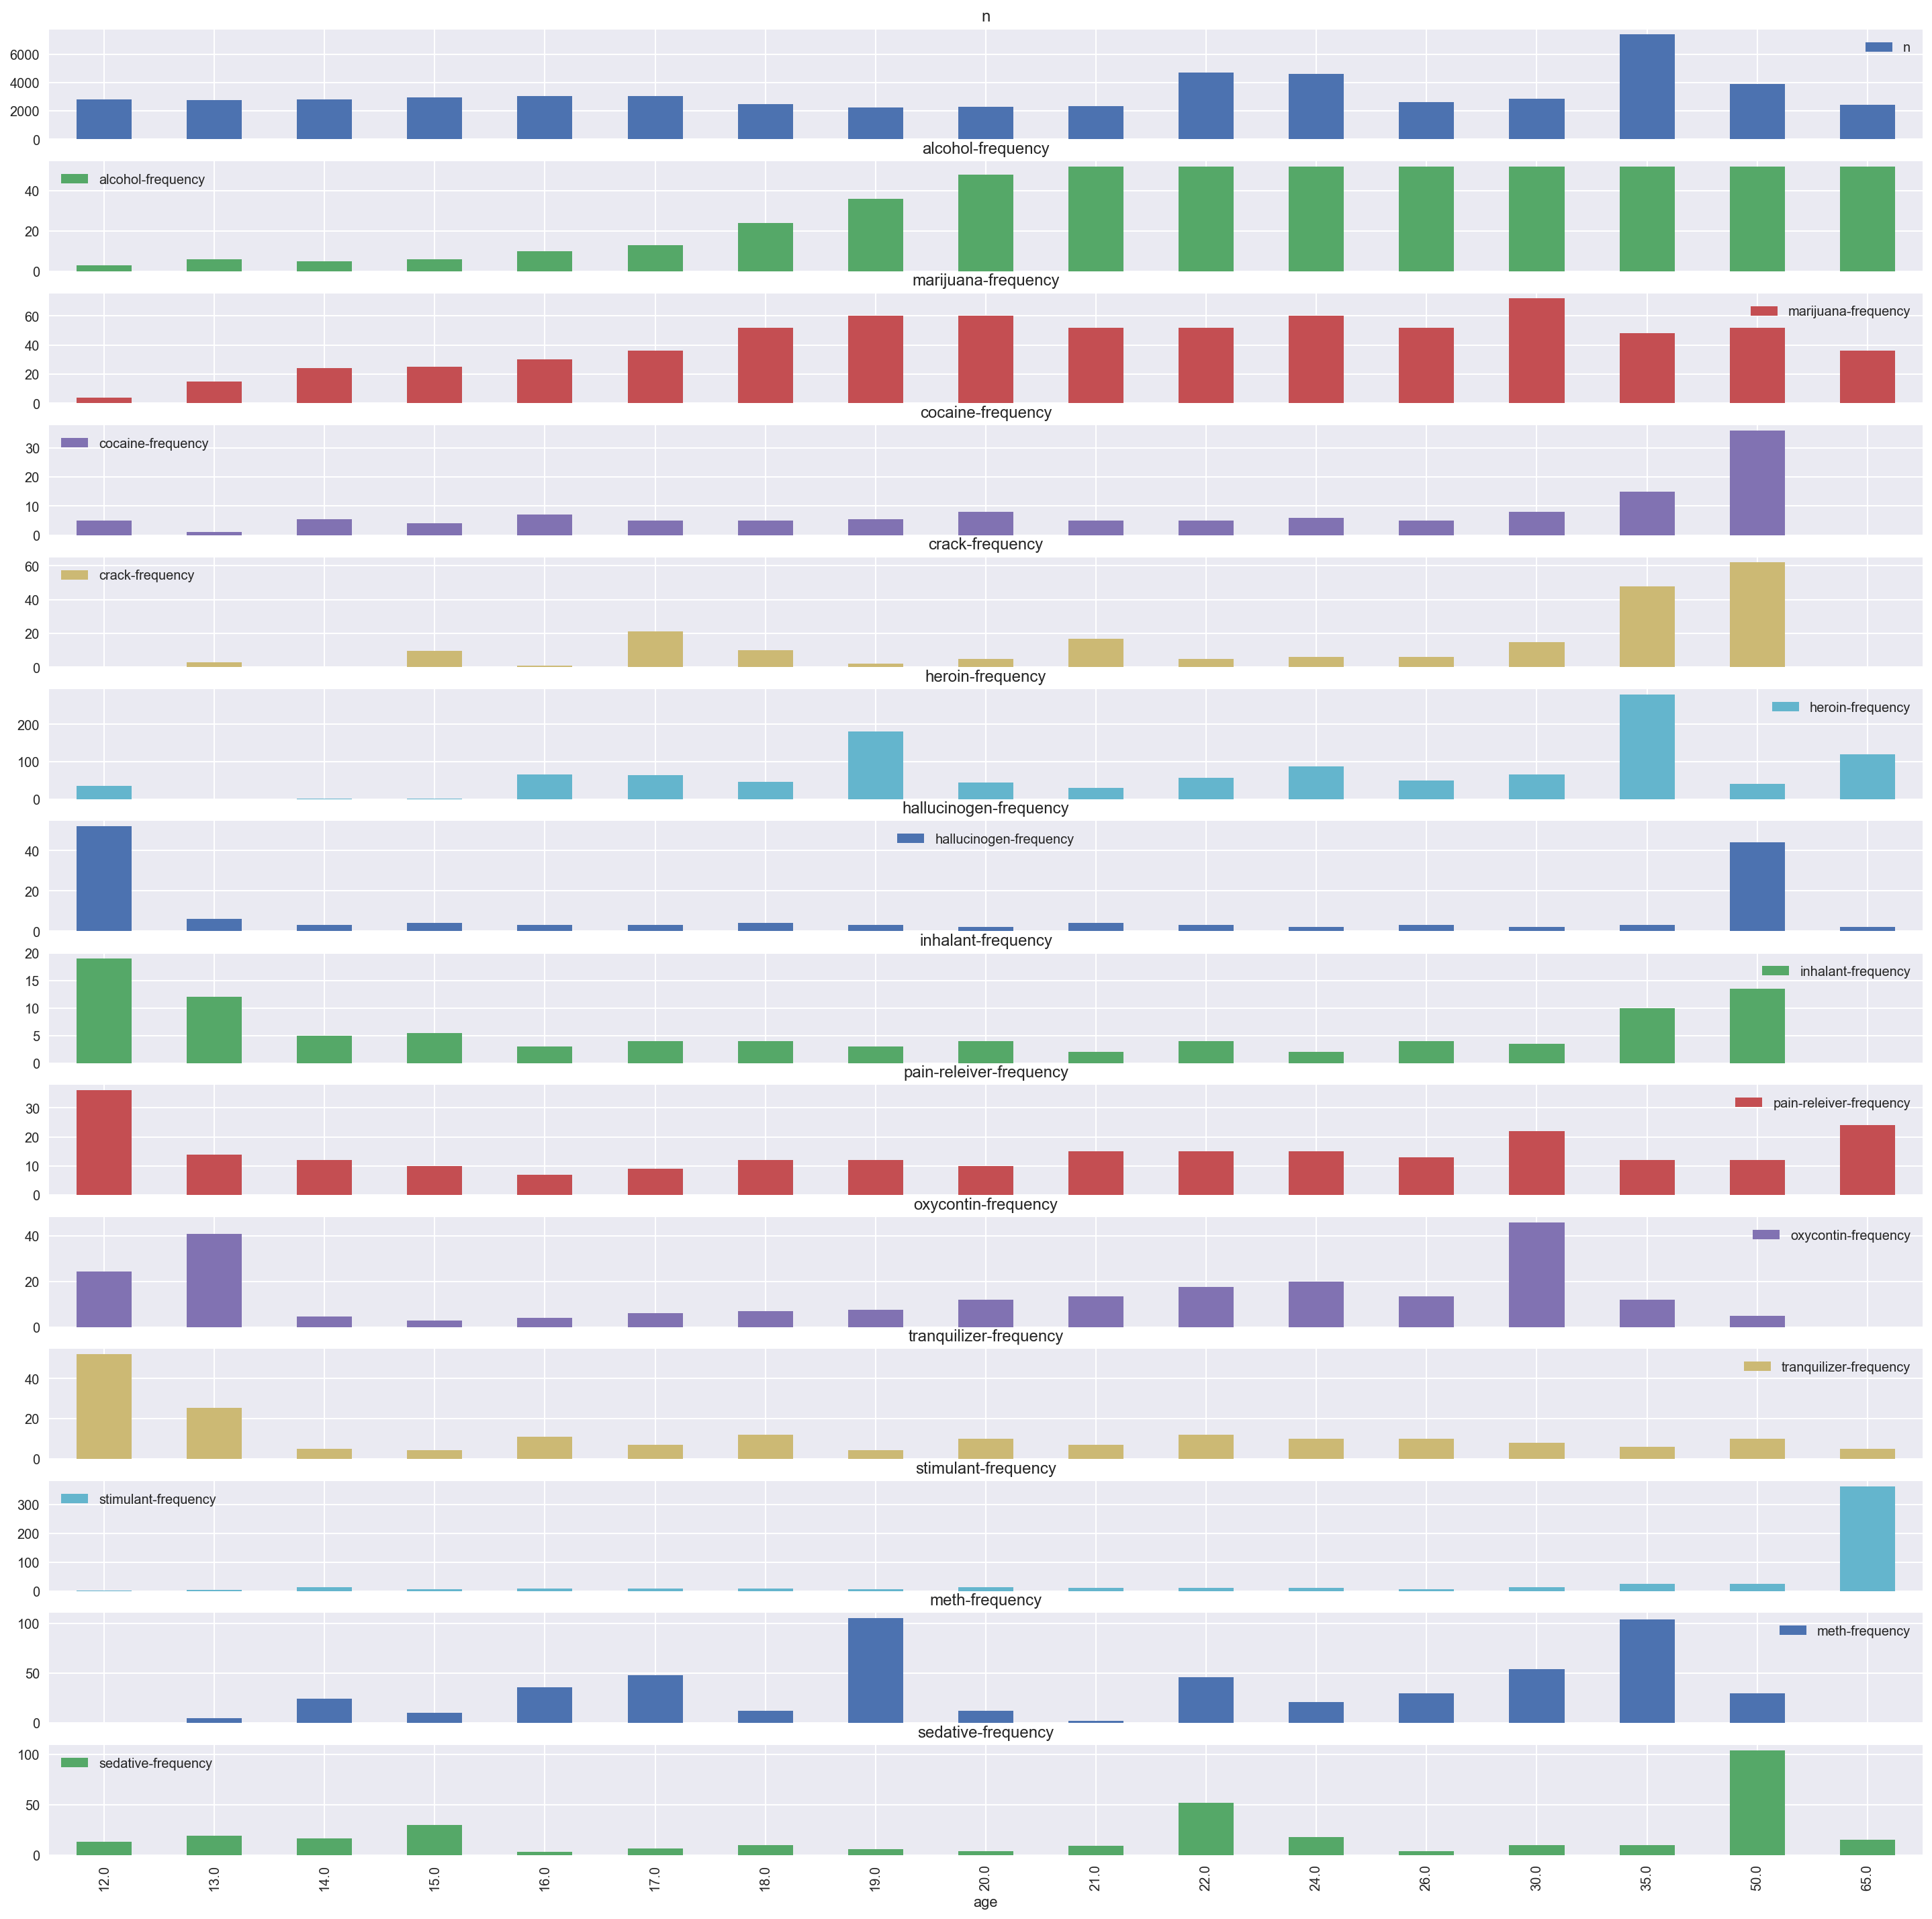

In [579]:
drug_freq.plot(x='age', kind='bar',grid=True,subplots=True,sharex=True, figsize = (25, 25));
# The below plot helps map a drug use frequency to an age group

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**


...

In [27]:
# Code

**Report**



...

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

In [146]:
# 1 . Pull out rate variable
rate = sat_df.Rate

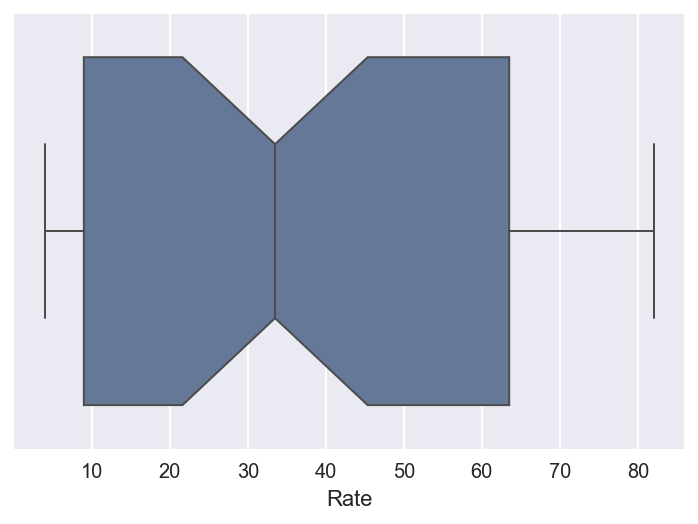

In [147]:
# 2. Are there any outliers in the dataset?
# A box plot can give an idea of outliers.
sns.boxplot(rate, orient = 'h', fliersize = 20, linewidth = 1, notch = True, saturation = 0.5)
# There are no obvious outliers in this series.

In [151]:
# Mathematically, Tukey method can be used to find outliers
# Numerical description of outlier: 
#     The formulas are:
#     Low outliers = Q1 – 1.5(Q3 – Q1) = Q1 – 1.5(IQR)
#     High outliers = Q3 + 1.5(Q3 – Q1) = Q3 + 1.5(IQR)
#     Where:
#     Q1 = first quartile
#     Q3 = third quartile
#     IQR = Interquartile range
min_Rate = rate.describe()[3]
Q1 = rate.describe()[4]
Q3 = rate.describe()[6]
max_Rate = rate.describe()[7]
IQR = Q3 - Q1
low_outliers = Q1 - 1.5 * (IQR)
high_outliers = Q3 + 1.5 * (IQR)

print('Least value in rate: ', min_Rate)
print('low_outliers', low_outliers)
if min_Rate > low_outliers:
    print('There are no outliers in the lower range\n')
print('Largest value in rate: ', max_Rate)
print('high_outliers', high_outliers)
if max_Rate < high_outliers:
    print('There are no outliers in the upper range')
    
print('\nCredits to Kina and Tui for the hint on slack regarding Tukey method.')

Least value in rate:  4.0
low_outliers -72.75
There are no outliers in the lower range

Largest value in rate:  82.0
high_outliers 145.25
There are no outliers in the upper range

Credits to Kina and Tui for the hint on slack regarding Tukey method.


In [152]:
#3, 4, 5  - There are no outliers in the rate column ftom the dataset

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
#### ANS: The Spearman rank correlation of Verbal and Math values is equal to the Pearsons correlation of the Rank of Verbal and Math values.(Inferred from the below steps)
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!
#### ANS: 
    - Get the rank list of the series that are to be compared. 
    - Find the covariance between the rank data.  
    - Calculate individual  standard deviations. 
    - Divide Covariance by the product of standard deviations. 
    - This is the spearman rank correlation.

In [254]:
import scipy.stats as stats
import numpy
stats.spearmanr(sat_df.Verbal, sat_df.Math)

SpearmanrResult(correlation=0.90520488479402839, pvalue=3.2352319597775181e-20)

In [255]:
verbal = sat_df.Verbal
math = sat_df.Math
# Use the scipy function to get the spearman rank corelation
print('Spearman Rank correlation using scipy function')
stats.spearmanr(verbal, math)

Spearman Rank correlation using scipy function


SpearmanrResult(correlation=0.90520488479402839, pvalue=3.2352319597775181e-20)

In [256]:
# Find the pearson correlation
print('Pearsons correlation using numpy function')
numpy.corrcoef(verbal, math)

Pearsons correlation using numpy function


array([[ 1.        ,  0.89987085],
       [ 0.89987085,  1.        ]])

In [257]:
# The Spearman rank correlation of Verbal and Math values = Pearsons correlation of the Rank of Verbal and Math values
# Find the pearsons correlation of the Verbal rank and Math rank.
verbal_rank = stats.rankdata(verbal, method = 'ordinal')
math_rank = stats.rankdata(math, method='ordinal')
print('Pearsons correlation of the Verbal rank and Math rank. The result is very close to the result of the spearman rank correlation of math and verbal found in previous steps')
numpy.corrcoef(verbal_rank, math_rank)

Pearsons correlation of the Verbal rank and Math rank. The result is very close to the result of the spearman rank correlation of math and verbal found in previous steps


array([[ 1.        ,  0.90241612],
       [ 0.90241612,  1.        ]])

### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

In [258]:
# sat_df['rank_Rate'] = stats.rankdata(sat_df.Rate, method = 'ordinal')
# 1. Covert rate to percentiles and create a new column
sat_df['perc_Rate'] = [ stats.percentileofscore(sat_df.Rate, rate, kind = 'strict') for rate in sat_df.Rate]
sat_df.head()

,State,Rate,Verbal,Math,pRate,perc_Rate,rank_Rate,perc_Rate_rank,perc_Math,perc_Verbal
0,CT,500,509,510,33.5,98.076923,52,52,28.846154,32.692308
1,NJ,81,499,513,33.5,96.153846,51,51,36.538462,17.307692
2,MA,79,511,515,33.5,94.230769,50,50,40.384615,38.461538
3,NY,77,495,505,33.5,92.307692,49,49,25.000000,11.538462
4,NH,72,520,516,33.5,90.384615,48,48,46.153846,44.230769


In [259]:
# 2. Print percentile of California State
sat_df.perc_Rate[sat_df.State == "CA"]

23    53.846154
Name: perc_Rate, dtype: float64

In [260]:
# 3. To find the relation between percentiles and Spearmans rank correlation, 
#    I am comparing SPCC caluclated with original values and its corresponding percentile values

# Calculate percentiles for Verbal and Math
sat_df['perc_Math'] = [ stats.percentileofscore(sat_df.Math, rate, kind = 'strict') for rate in sat_df.Math]
sat_df['perc_Verbal'] = [ stats.percentileofscore(sat_df.Verbal, rate, kind = 'strict') for rate in sat_df.Verbal]

print(stats.spearmanr(sat_df.perc_Verbal, sat_df.perc_Math))
print(stats.spearmanr(sat_df.Verbal, sat_df.Math))
print('\nANS: The SPCC calculated using the original Math and Verbal values IS EQUAL TO SPCC caluclated using its percentile values')

SpearmanrResult(correlation=0.90520488479402839, pvalue=3.2352319597775181e-20)
SpearmanrResult(correlation=0.90520488479402839, pvalue=3.2352319597775181e-20)

ANS: The SPCC calculated using the original Math and Verbal values IS EQUAL TO SPCC caluclated using its percentile values


### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.

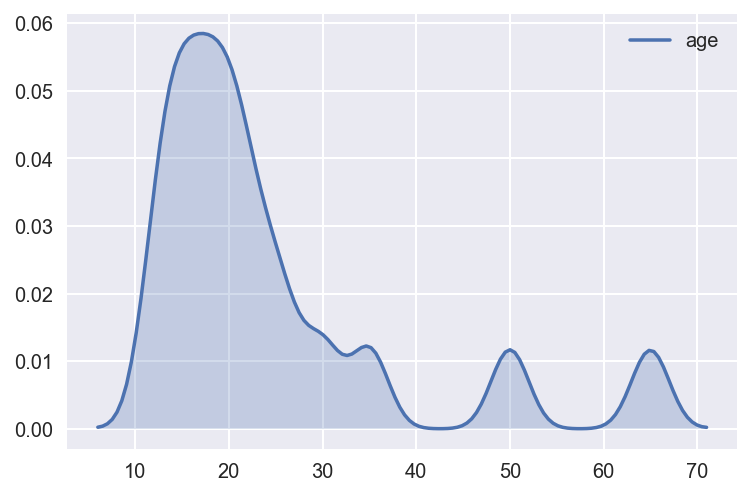

In [322]:
# 1 - With percentile scoring it is easy to identify potential outliers 
# i.e. Values with precentiles < 25 and > 75 are potential outliers.

#2 Plot distribution of the variable - AGE from the drug dataset
# sns.distplot(drug_df.age, rug = True, kde = False, bins = 20)
sns.kdeplot(drug_df.age, shade = True, bw = 2)

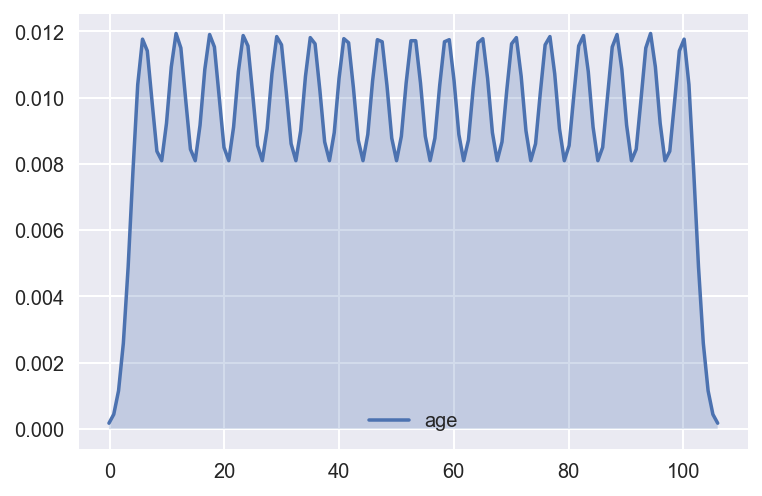

In [327]:
# Plot distribution of the percentile scores of age variable
perc_age['age'] = pd.DataFrame([ stats.percentileofscore(drug_df.age, age) for age in drug_df.age])
sns.kdeplot(perc_age.age, shade = True, bw = 2)
# sns.distplot(perc_age.age, rug = True, kde = False, bins = 20)

In [ ]:
# 4. Visual effect of converting raw score to percentiles:
# The distribution of raw scores provides an idea of the distribution of values
# The distribution of the percentiles is a straight line with no slope as percentile is always a distinct value.


# Conclusion:
#   Distribution of a raw score is meaningful whereas a distrbution of percentile scores is not meaningful.
#   It is easy to identify potential outliers observing percentile scores when compared to observing raw scores